Question

The candidate with level 6.5 had a previous salary of 160000. In order to hire him in our new company, we would like to confirm if he is being honest about his last salary and we will can predict this using the Random Forest.

Agenda:

To be able to predict the salaries of the organisation and be able to decide the limit to be given.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [9]:
df.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


Positive correlation

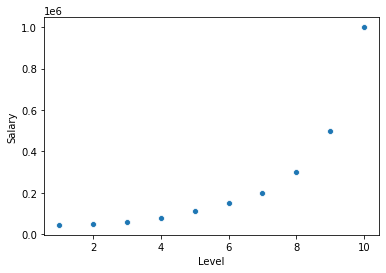

In [12]:
sns.scatterplot(x = 'Level', y = 'Salary', data = df)

In [13]:
x = df.iloc[:, 1]
y = df['Salary']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=4)
x_train=np.array(x_train).reshape(-1, 1)
y_train=np.array(y_train).reshape(-1, 1)
x_test=np.array(x_test).reshape(-1, 1)
y_test=np.array(y_test).reshape(-1, 1)

In [15]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=700,random_state=1)
model.fit(x_train,y_train.ravel())

RandomForestRegressor(n_estimators=700, random_state=1)

In [17]:
print("r2 for train:", model.score(x_train,y_train))
print("r2 for test:", model.score(x_test,y_test))

y_est_train = model.predict(x_train)
y_est_test = model.predict(x_test)

from sklearn.metrics import mean_squared_error
print("rmse for train:",np.sqrt(mean_squared_error(y_train, y_est_train)))
print("rmse for test:",np.sqrt(mean_squared_error(y_test, y_est_test)),)

r2 for train: 0.9242995624470672
r2 for test: 0.9914129600200736
rmse for train: 86706.73352447296
rmse for test: 17728.10376958873


In [18]:
x = 6.5
x = np.array(x).reshape(-1,1)
y_pred = model.predict(x)
y_pred

array([175042.85714286])

Therefore, we get the predicted value of Salary to be 175042.86 for level = 6.5
Also, our rmse, absolute error in prediction of test data is 17728.10. 
Hence, the Salary of employer may be in following range,
     160000 - 17728.104 = 142271.896 and 
    160000 + 17728.104 = 177728.104
The employer claimed his salary to be 160000 at level 6.5 may be considered to be true. As the Salary value is close to  the estimated value.